# Setting the environment

In [183]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'gender_submission.csv']


# Loading Data ...

In [184]:
train = pd.read_csv('../input/train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
test=pd.read_csv('../input/test.csv')
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Manipulation and Analysis

**Label Encoding of datatypes from objects to categories and then further into numeric datatypes**

In [186]:
train.Sex=train.Sex.astype('category').cat.codes
test.Sex=test.Sex.astype('category').cat.codes

In [187]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [188]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


**One hot encoding for categorical variables**

In [189]:
train_df=train.copy()
test_df=test.copy()
train_df = pd.get_dummies(train_df, columns=['Embarked', 'Pclass'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked', 'Pclass'], drop_first=True)

In [190]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [191]:
train_df.info()
print(test_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Name           891 non-null object
Sex            891 non-null int8
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
dtypes: float64(2), int64(4), int8(1), object(3), uint8(4)
memory usage: 67.1+ KB
   PassengerId   ...    Pclass_3
0          892   ...           1
1          893   ...           1
2          894   ...           0
3          895   ...           1
4          896   ...           1

[5 rows x 13 columns]


**Calculating the mean age for both the test and train dataset and using imputation to replace the value of the mean age wherever an NaN value exists**

In [192]:
age_mean=train_df.Age.mean()
#train_df.Age=train_df.Age.fillna()

In [193]:
#train_df['Age'].fillna(age_mean,inplace=True)
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)

Taking a peek at the dataframe, its dimensions and datatypes

In [194]:
train_df.head(10)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,1,0,1
5,6,0,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,1,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0,1,0,0
7,8,0,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,0,1,0,1
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,0,1,0,1
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,0,0,1,0


In [195]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Name           891 non-null object
Sex            891 non-null int8
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
dtypes: float64(2), int64(4), int8(1), object(3), uint8(4)
memory usage: 67.1+ KB


In [196]:
age_mean_test=test_df['Age'].mean()
print(age_mean_test)
#test_df['Age'].fillna(age_mean_test,inplace=True)
test_df['Age'].fillna(test_df['Age'].median(),inplace=True)

30.272590361445783


In [197]:
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)

In [198]:
test_df.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [199]:
test_df.drop(columns=['Cabin','Name','Ticket'],axis=1,inplace=True)

In [200]:
train_df.drop(columns=['Cabin','Name','Ticket'],axis=1,inplace=True)

In [201]:
train_df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Sex    ...     Embarked_S  Pclass_2  Pclass_3
0              1         0    1    ...              1         0         1
1              2         1    0    ...              0         0         0
2              3         1    0    ...              1         0         1
3              4         1    0    ...              1         0         0
4              5         0    1    ...              1         0         1
5              6         0    1    ...              0         0         1
6              7         0    1    ...              1         0         0
7              8         0    1    ...              1         0         1
8              9         1    0    ...              1         0         1
9             10         1    0    ...              0         1         0
10            11         1    0    ...              1         0         1
11            12         1    0    ...              1         0         0
12  

# Data Visualiation using matplotlib and seaborn

Pearson's correlation coefficient between all columns in the dataframe

In [202]:
corr = train_df.corr(method='pearson')
corr

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005007,0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.033606,0.022148,-0.000086,-0.029486
Survived,-0.005007,1.000000,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.003650,-0.155660,0.093349,-0.322308
Sex,0.042939,-0.543351,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.074115,0.125722,-0.064746,0.137143
Age,0.034212,-0.064910,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.031415,-0.014665,0.015831,-0.291955
SibSp,-0.057527,-0.035322,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.026354,0.070941,-0.055932,0.092548
Parch,-0.001652,0.081629,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.081228,0.063036,-0.000734,0.015790
Fare,0.012658,0.257307,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.117216,-0.166603,-0.118557,-0.413333
Embarked_Q,-0.033606,0.003650,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,1.000000,-0.496624,-0.127301,0.237449
Embarked_S,0.022148,-0.155660,0.125722,-0.014665,0.070941,0.063036,-0.166603,-0.496624,1.000000,0.192061,-0.009511
Pclass_2,-0.000086,0.093349,-0.064746,0.015831,-0.055932,-0.000734,-0.118557,-0.127301,0.192061,1.000000,-0.565210


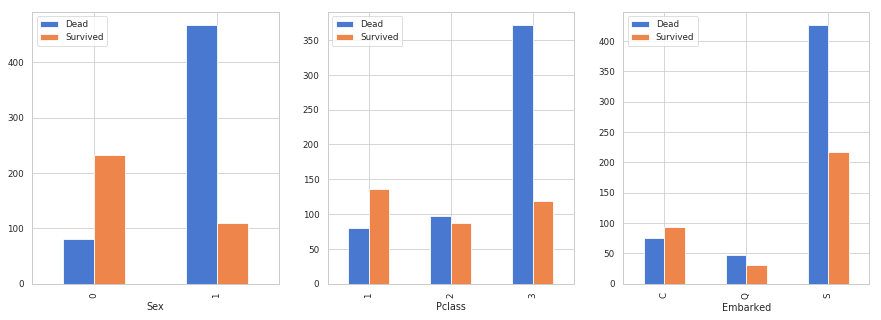

In [203]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
cat_columns = ['Sex','Pclass','Embarked']
for i in range(len(cat_columns)):
    curr_feature = cat_columns[i]
    train.groupby([curr_feature, 'Survived'])['PassengerId'].count().unstack().plot(kind = 'bar', stacked = False, ax = axes[i])
    axes[i].legend(['Dead','Survived'])

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


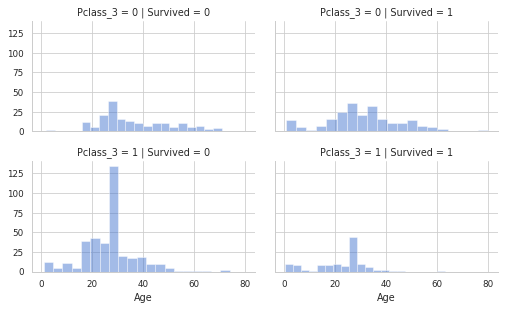

In [204]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass_3', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

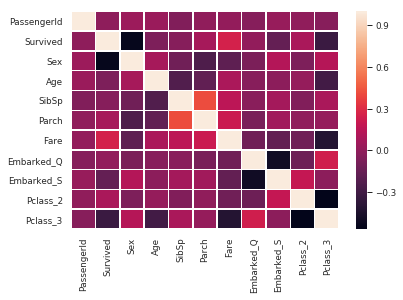

In [205]:
sns.set(context='paper', style='whitegrid', palette='muted', font='sans-serif', font_scale=1, color_codes=True, rc=None)
sns.heatmap(corr,linewidths=.5)

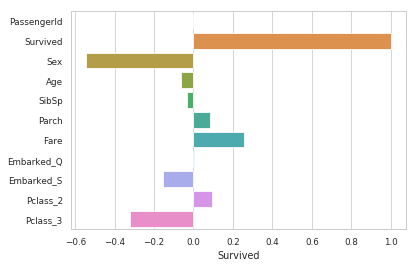

In [206]:
sns.barplot(x=corr.Survived,y=corr.columns)

# Importing scikit learn library and regression, classification bundles 

In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

logReg=LogisticRegression(solver='liblinear')
sgdcls=SGDClassifier()
nbcls=GaussianNB()
knn=KNeighborsClassifier()
desclr=DecisionTreeClassifier()
svc=SVC()
ada=AdaBoostClassifier()
#cvs=cross_val_score()
#confusion_matrix=confusion_matrix()

Test-train split isn't needed since the data was already split before and only the X_train and y_train should be defined properly

# Preparing the data to train ML models

In [208]:
X=train_df.drop('Survived',axis=1)
y=train_df['Survived']
from sklearn.model_selection import train_test_split
X_train, X_df_test, y_train, y_df_test = train_test_split(X, y, test_size=0.20, random_state=42)

Using logistic regression to fit the X_train and y_train to the model and make predictions

# Selecting, training and validating multiple ML models

In [209]:
logReg.fit(X_train,y_train)
prediction=logReg.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(logReg,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log = round(logReg.score(X_train,y_train) * 100, 2)
acc_log

Score: [0.8041958  0.82517483 0.7972028  0.73943662 0.84397163]


81.04

Using a Stochastic gradient descent classifier to fit, train and predict using a gradient descent optimization method

In [210]:
#SGDClassifier
sgdcls.fit(X_train,y_train)
prediction_sgdcls=sgdcls.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(sgdcls,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_sgdcls = round(sgdcls.score(X_train,y_train) * 100, 2)
acc_log_sgdcls

Score: [0.37062937 0.6993007  0.61538462 0.63380282 0.65957447]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

63.06

Naive-Bayes calssifier to train the model and make predictions

In [211]:
nbcls.fit(X_train,y_train)
prediction_nbcls=nbcls.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(nbcls,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_nbcls = round(nbcls.score(X_train,y_train) * 100, 2)
acc_log_nbcls

Score: [0.78321678 0.81818182 0.81818182 0.71830986 0.75886525]


80.34

K-Nearest Neighbors method to make predictions

In [212]:
knn.fit(X_train,y_train)
prediction_knn=knn.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(knn,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_knn = round(knn.score(X_train,y_train) * 100, 2)
acc_log_knn

Score: [0.65734266 0.61538462 0.58741259 0.58450704 0.65248227]


75.14

Using a Decision Tree classifier to make predictions

In [213]:
#DecisionTreeClassifier
desclr.fit(X_train,y_train)
prediction_desclr=desclr.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(desclr,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_desclr = round(desclr.score(X_train,y_train) * 100, 2)
acc_log_desclr

Score: [0.74825175 0.72727273 0.72727273 0.74647887 0.75177305]


100.0

Using a Support Vector Classifier to build a model and make predictions

In [214]:
svc.fit(X_train,y_train)
prediction_svc=svc.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(svc,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_svc = round(svc.score(X_train,y_train) * 100, 2)
acc_log_svc

Score: [0.63636364 0.62937063 0.60839161 0.61267606 0.61702128]


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

99.3

AdaBoost classifier for making predictions using train and test data

In [215]:
ada.fit(X_train,y_train)
prediction_svc=ada.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(ada,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_ada = round(ada.score(X_train,y_train) * 100, 2)
acc_log_ada

Score: [0.79020979 0.7972028  0.79020979 0.78169014 0.77304965]


83.85

Logistic Regression for prediction

In [216]:
prediction_test=logReg.predict(test_df)

# Fine Tuning the model by trying to reduce the overfit (if there is) by reducing the number of features in the dataframe for training

In [217]:
#x = train_df['PassengerId','Pclass','Sex','Age','Parch','Fare','Cabin','Embarked','PassengerType','FamilySize']
y_new = train_df['Survived']
X_new = train_df.drop('Survived', axis = 1)
X_new = train_df.drop('SibSp', axis = 1)

In [218]:
ada.fit(X_new,y_new)
prediction_svc=ada.predict(X_df_test)
#pred_train=logReg.predict(train_y)
score=cross_val_score(ada,X_new,y_new,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log_ada = round(ada.score(X_new,y_new) * 100, 2)
acc_log_ada

Score: [1. 1. 1. 1. 1.]


100.0